In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as Layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image

import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/COVID Kaggle Data/Chest_xray_Corona_Metadata.csv')
df.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [4]:
#Remove null values and change to 'unknown'
df.fillna('unknown', inplace=True)
df.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [5]:
#Separate train data and test data.
train_data = df[df['Dataset_type']=='TRAIN']
test_data = df[df['Dataset_type']=='TEST']

In [6]:
#Get the path of train and test folders. NOTE to TA: Type in filepath here.
train_img_path = '/content/drive/MyDrive/COVID Kaggle Data/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
test_img_path = '/content/drive/MyDrive/COVID Kaggle Data/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

In [7]:
#Remove pnuemonia with unknown value (i.e. unknown diagnosis of COVID-19).
final_train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') &
                               (train_data['Label_2_Virus_category'] == 'COVID-19'))]

In [8]:
#Add a target and class feature.
final_train_data['class'] = final_train_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
test_data['class'] = test_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')

final_train_data['target'] = final_train_data.Label.apply(lambda x: 0 if x=='Normal' else 1)
test_data['target'] = test_data.Label.apply(lambda x: 0 if x=='Normal' else 1)

In [9]:
#Get the important features.
final_train_data = final_train_data[['X_ray_image_name', 'class', 'target', 'Label_2_Virus_category']]
final_test_data = test_data[['X_ray_image_name', 'class', 'target']]

In [10]:
test_data['Label'].value_counts()

Pnemonia    390
Normal      234
Name: Label, dtype: int64

### DATA AUGMENTATION

In [11]:
#Create a imagegenerator for for augmentation.
datagen =  ImageDataGenerator(
  shear_range=0.2,
  zoom_range=0.2,
)

#Function to convert image to array.
def read_img(filename, size, path):
    img = image.load_img(os.path.join(path, filename), target_size=size)
    #Convert image to array.
    img = image.img_to_array(img) / 255
    return img

In [12]:
#Augment the images labeled with covid-19 to balance the data.
corona_df = final_train_data[final_train_data['Label_2_Virus_category'] == 'COVID-19']
with_corona_augmented = []

#Create a function for augmentation.
def augment(name):
    img = read_img(name, (224,224), train_img_path)
    i = 0
    for batch in tqdm(datagen.flow(tf.expand_dims(img, 0), batch_size=32)):
        with_corona_augmented.append(tf.squeeze(batch).numpy())
        if i == 20:
            break
        i =i+1

#Apply the function.
corona_df['X_ray_image_name'].apply(augment)

19it [00:00, 81.16it/s]
20it [00:00, 88.23it/s]
11it [00:00, 50.48it/s] 
19it [00:00, 80.25it/s]
20it [00:00, 86.00it/s]
18it [00:00, 72.13it/s]
19it [00:00, 82.83it/s]
20it [00:00, 87.13it/s]
20it [00:00, 86.48it/s]
18it [00:00, 74.03it/s]
20it [00:00, 87.40it/s]
20it [00:00, 88.11it/s]
20it [00:00, 90.23it/s]
20it [00:00, 89.16it/s]
20it [00:00, 88.96it/s]
20it [00:00, 88.06it/s]
19it [00:00, 80.29it/s]
20it [00:00, 88.58it/s]
18it [00:00, 76.58it/s]
20it [00:00, 90.35it/s]
20it [00:00, 86.55it/s]
20it [00:00, 88.30it/s]
19it [00:00, 82.42it/s]
18it [00:00, 76.26it/s]
19it [00:00, 81.64it/s]
20it [00:00, 85.03it/s]
20it [00:00, 89.95it/s]
19it [00:00, 81.03it/s]
19it [00:00, 79.11it/s]
20it [00:00, 88.81it/s]
20it [00:00, 89.49it/s]
20it [00:00, 86.77it/s]
20it [00:00, 90.03it/s]
20it [00:00, 87.62it/s]
20it [00:00, 88.60it/s]
19it [00:00, 80.17it/s]
19it [00:00, 82.47it/s]
20it [00:00, 87.51it/s]
20it [00:00, 89.48it/s]
20it [00:00, 90.85it/s]
20it [00:00, 86.25it/s]
20it [00:00, 87

5221    None
5222    None
5223    None
5224    None
5225    None
5226    None
5227    None
5228    None
5229    None
5230    None
5237    None
5238    None
5239    None
5240    None
5242    None
5243    None
5244    None
5245    None
5246    None
5247    None
5248    None
5249    None
5250    None
5251    None
5252    None
5253    None
5254    None
5255    None
5256    None
5257    None
5258    None
5259    None
5260    None
5261    None
5262    None
5263    None
5264    None
5265    None
5266    None
5267    None
5268    None
5269    None
5270    None
5271    None
5272    None
5273    None
5274    None
5275    None
5276    None
5277    None
5278    None
5279    None
5280    None
5281    None
5282    None
5283    None
5284    None
5285    None
Name: X_ray_image_name, dtype: object

In [13]:
#Extract the image from traing data and test data, then convert it to an array.
train_arrays = [] 
final_train_data['X_ray_image_name'].apply(lambda x: train_arrays.append(read_img(x, (224,224), train_img_path)))
test_arrays = []
final_test_data['X_ray_image_name'].apply(lambda x: test_arrays.append(read_img(x, (224,224), test_img_path)))

5286    None
5287    None
5288    None
5289    None
5290    None
        ... 
5905    None
5906    None
5907    None
5908    None
5909    None
Name: X_ray_image_name, Length: 624, dtype: object

In [14]:
#Concatenate the training data labels and the labels for augmented images.
y_train = np.concatenate((np.int64(final_train_data['target'].values), np.ones(len(with_corona_augmented), dtype=np.int64)))

### CONVERT ALL THE DATA TO TENSORS

In [15]:
train_tensors = tf.convert_to_tensor(np.concatenate((np.array(train_arrays), np.array(with_corona_augmented))))
test_tensors  = tf.convert_to_tensor(np.array(test_arrays))
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(final_test_data['target'].values)

### CREATE A TENSOR DATASET

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_tensors, y_train_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((test_tensors, y_test_tensor))

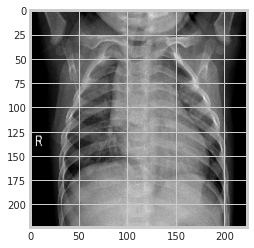

In [17]:
for i,l in train_dataset.take(1):
    plt.imshow(i);

### GENERATE BATCHES

In [18]:
BATCH_SIZE = 16
BUFFER = 1000

train_batches = train_dataset.shuffle(BUFFER).batch(BATCH_SIZE)
test_batches = test_dataset.batch(BATCH_SIZE)

for i,l in train_batches.take(1):
    print('Train Shape per Batch: ',i.shape);
for i,l in test_batches.take(1):
    print('Test Shape per Batch: ',i.shape);

Train Shape per Batch:  (16, 224, 224, 3)
Test Shape per Batch:  (16, 224, 224, 3)


### ATTEMPT OF POSSIBLE WAYS TO EXTEND SOURCE CODE
The following cell uses the `kerastuner` library to explore good parameter values for a dense layer. It is clear from the printed results that 128 is a strong value. This is the same as the original value.


In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import keras.layers as Layers
from keras.models import Sequential 
import tensorflow as tf

#Define input shape.
INPUT_SHAPE = (224,224,3) 

def build_model(hp): 
  #Get the pretrained model.
  base_model = tf.keras.applications.NASNetMobile(input_shape= INPUT_SHAPE,
                                                include_top=False,
                                                weights='imagenet')
  
  #Set all existing layers to not trainable.
  base_model.trainable = False

  model = Sequential()
  model.add(base_model)
  model.add(Layers.GlobalAveragePooling2D())
  model.add(Layers.Dense((hp.Int("input_units", 64, 256, step = 32))))
  model.add(Layers.Dropout(0.2))
  model.add(Layers.Dense(1, activation = 'sigmoid'))


  model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

  return model

LOG_DIR = "/content/drive/MyDrive/Colab Notebooks"

#'objective' represents what we are interested in improving. A high value of 'executions_per_trial'
#allows us to get a model with strong performance.
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 1,
    executions_per_trial = 1,
    directory = LOG_DIR
)

tuner.search(x = train_tensors,
             y = y_train_tensor,
             epochs = 1,
             batch_size = 64,
             validation_data = (test_tensors, y_test_tensor))

#According to the tuner results the best parameter for the dense layer is 128.
print(tuner.results_summary())

Final extension of source code below.

In [ ]:
#Get the pretrained model
base_model = tf.keras.applications.NASNetMobile(input_shape= INPUT_SHAPE,
                                              include_top=False,
                                              weights='imagenet')

for layer in base_model.layers[:768]:
  layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Layers.GlobalAveragePooling2D())
model.add(Layers.Dense(128))
model.add(Layers.Dropout(0.2))
model.add(Layers.Dense(128))
model.add(Layers.Dense(128))
model.add(Layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
            loss = 'binary_crossentropy',
            metrics=['accuracy'])


model.fit(train_batches, epochs=15, validation_data=test_batches)

In [ ]:
#Predict the test data
pred = model.predict_classes(np.array(test_arrays))

In [ ]:
#Print a classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_data['target'], pred.flatten()))

In [ ]:
import sklearn

actLabels = test_data['target']
predLabels = pred.flatten()

#Accuracy, precision, and recall.
accuracy = sklearn.metrics.accuracy_score(actLabels, predLabels,  normalize = True)
precision = sklearn.metrics.precision_score(actLabels, predLabels)
recall = sklearn.metrics.recall_score(actLabels, predLabels)

#Confusion matrix.
data = {'yActual': actLabels, 'yPredicted': predLabels}
df = pd.DataFrame(data, columns=['yActual','yPredicted'])
confusionMatrix = pd.crosstab(df['yActual'], df['yPredicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusionMatrix)